A partir de los datos proporcionas en datos csv de train y test de Fashion-MNIST.

https://www.kaggle.com/zalando-research/fashionmnist
    
    

    Esta actividad deberás hacerla en un Jupyter-Notebok de Google-Colab normalito, no requieres GPU ni los recursos del CADS. Sin embargo, lo puedes hacer ahí si así lo deseas.
    Puedes usar PyTorch o Keras, con el que desees.
    Descargar los datos csv de train y test de Fashion-MNIST: https://www.kaggle.com/zalando-research/fashionmnist
    El conjunto de datos test (que son 10 mil) divídelo en 50% para validación y 50% para test.
    

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [54]:
import torch
import torch.nn as nn
from torch.autograd import Variable

import torchvision
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
from sklearn.metrics import confusion_matrix


### Carga de los datos 

In [55]:
train_csv = pd.read_csv("/home/cads/Documentos/making/Hello_CNN/data_csv/fashion-mnist_validation.csv")
test_csv = pd.read_csv("/home/cads/Documentos/making/Hello_CNN/data_csv/fashion-mnist_test.csv")

### Clase para construir un dataset usando clase de datos de Pytorch 
"""User defined class to build a datset using Pytorch class Dataset."""

In [56]:
class FashionDataset(Dataset):
    
    def __init__(self, data, transform = None):
        """Method to initilaize variables.""" 
        self.fashion_MNIST = list(data.values)
        self.transform = transform
        
        label = []
        image = []
        
        for i in self.fashion_MNIST:
             # first column is of labels.
            label.append(i[0])
            image.append(i[1:])
        self.labels = np.asarray(label)
        # Dimension of Images = 28 * 28 * 1. where height = width = 28 and color_channels = 1.
        self.images = np.asarray(image).reshape(-1, 28, 28, 1).astype('float32')

    def __getitem__(self, index):
        label = self.labels[index]
        image = self.images[index]
        
        if self.transform is not None:
            image = self.transform(image)

        return image, label

    def __len__(self):
        return len(self.images)


### Transform data into Tensor that has a range from 0 to 1

In [57]:

train_set = FashionDataset(train_csv, transform=transforms.Compose([transforms.ToTensor()]))
test_set = FashionDataset(test_csv, transform=transforms.Compose([transforms.ToTensor()]))

train_loader = DataLoader(train_set, batch_size=100)
test_loader = DataLoader(train_set, batch_size=100)

###  Using FashionMNIST class from torchvision module.

In [58]:
len(train_set)

5000

In [59]:
len(test_set)

5000

In [60]:
train_set = torchvision.datasets.FashionMNIST("/home/cads/Documentos/making/Hello_CNN/data", download=False, transform=
                                                transforms.Compose([transforms.ToTensor()]))
#test_set = torchvision.datasets.FashionMNIST("/home/cads/Documentos/making/Hello_CNN/data", download=False, train=False, transform=
#                                               transforms.Compose([transforms.ToTensor()]))  

In [61]:
train_loader = torch.utils.data.DataLoader(train_set, 
                                           batch_size=100)
test_loader = torch.utils.data.DataLoader(test_set,
                                          batch_size=100)

In [62]:
print('Tamaño entrenamiento: ',len(train_set))
print('Tamaño prueba: ',len(test_set))

Tamaño entrenamiento:  60000
Tamaño prueba:  5000


In [63]:


def output_label(label):
    output_mapping = {
                 0: "T-shirt/Top",
                 1: "Trouser",
                 2: "Pullover",
                 3: "Dress",
                 4: "Coat", 
                 5: "Sandal", 
                 6: "Shirt",
                 7: "Sneaker",
                 8: "Bag",
                 9: "Ankle Boot"
                 }
    input = (label.item() if type(label) == torch.Tensor else label)
    return output_mapping[input]



In [64]:
a = next(iter(train_loader))
a[0].size()


torch.Size([100, 1, 28, 28])

Cantidad de muestra por dataset

In [65]:
len(train_set)

60000

In [66]:
len(test_set)

5000

### Se muestra un ejemplo de la coleccion cargada

9


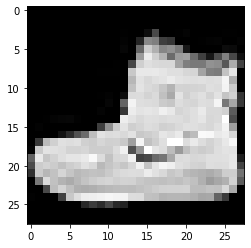

In [67]:
image, label = next(iter(train_set))
plt.imshow(image.squeeze(), cmap="gray")
print(label)


In [68]:
demo_loader = torch.utils.data.DataLoader(train_set, batch_size=10)

batch = next(iter(demo_loader))
images, labels = batch
print(type(images), type(labels))
print(images.shape, labels.shape)

<class 'torch.Tensor'> <class 'torch.Tensor'>
torch.Size([10, 1, 28, 28]) torch.Size([10])


labels:  Ankle Boot, T-shirt/Top, T-shirt/Top, Dress, T-shirt/Top, Pullover, Sneaker, Pullover, Sandal, Sandal, 

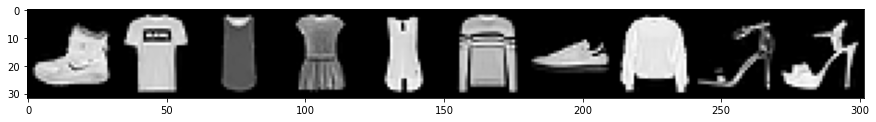

In [69]:


grid = torchvision.utils.make_grid(images, nrow=10)

plt.figure(figsize=(15, 20))
plt.imshow(np.transpose(grid, (1, 2, 0)))
print("labels: ", end=" ")
for i, label in enumerate(labels):
    print(output_label(label), end=", ")



### Diseño del modelo CNN

Diseño una red CNN con la siguiente arquitectura:  
        Una capa CNN con 6 feature maps con tamaño de kernels 5x5, strides=1 y funciones Relu.  
        Capa Maxpooling 2x2 
        
Conv2d(1, 32, kernel_size=(5, 5), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=1, padding=0, dilation=1, ceil_mode=False)
  )        
        
        
        
        Otra capa CNN con 16 feature maps con tamaño de kernels   5x5, strides=1 y funciones Relu.      
        Capa Fully Connected (o densa) de 120 neuronas    
        Salida softmax de 10 clases   
        
        
        
        
        Puedes buscar el mejor optimizador que funcione: SGD, Adam, etc.  
        
        Métrica Accuracy y función de error alguna de las categóricas de crossentropy. Puedes variar todos los demás parámetros e hiperparámetros como desees.
        

In [83]:
class Hello_CNN(nn.Module):
    
    def __init__(self):
        super(Hello_CNN, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=32, kernel_size=3, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2)
        )
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3),
            nn.BatchNorm2d(64),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
        
        self.fc1 = nn.Linear(in_features=64*6*6, out_features=600)
        self.drop = nn.Dropout2d(0.25)
        self.fc2 = nn.Linear(in_features=600, out_features=120)
        self.fc3 = nn.Linear(in_features=120, out_features=10)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.view(out.size(0), -1)
        out = self.fc1(out)
        out = self.drop(out)
        out = self.fc2(out)
        out = self.fc3(out)
        
        return out

In [84]:
### Modelo de CNN

In [85]:
model = Hello_CNN()
model.to("cpu")

error = nn.CrossEntropyLoss()

learning_rate = 0.001
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
print(model)

Hello_CNN(
  (layer1): Sequential(
    (0): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (layer2): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc1): Linear(in_features=2304, out_features=600, bias=True)
  (drop): Dropout2d(p=0.25, inplace=False)
  (fc2): Linear(in_features=600, out_features=120, bias=True)
  (fc3): Linear(in_features=120, out_features=10, bias=True)
)


### Entrenado la red y verificándola con el dataset de prueba

Realiza el entrenamiento del modelo con los datos de train (60 mil) y de validación (5 mil).
        Realiza una 30 épocas con tamaño de batch=32 o 16 o la que mejor te funcione.
        Obtén al final el accuracy del conjunto de prueba (test, 5 mil) y su matriz de confusión.

In [86]:
print('Tamaño entrenamiento: ',len(train_set))
print('Tamaño prueba: ',len(test_set))

Tamaño entrenamiento:  60000
Tamaño prueba:  5000


In [ ]:
num_epochs = 10
count = 0
# Lists for visualization of loss and accuracy 
loss_list = []
iteration_list = []
accuracy_list = []

# Lists for knowing classwise accuracy
predictions_list = []
labels_list = []
device = torch.device("cpu")

for epoch in range(num_epochs):
    print('Epoca ',epoch)
    for images, labels in train_loader:
        #print('Contador: ', count)
        # Transfering images and labels to GPU if available
        images, labels = images.to(device), labels.to(device)
    
        train = Variable(images.view(100, 1, 28, 28))
        labels = Variable(labels)
        
        # Forward pass 
        outputs = model(train)
        loss = error(outputs, labels)
        
        # Initializing a gradient as 0 so there is no mixing of gradient among the batches
        optimizer.zero_grad()
        
        #Propagating the error backward
        loss.backward()
        
        # Optimizing the parameters
        optimizer.step()
    
        count += 1
    
    # Testing the model
    
        if not (count % 50):    # It's same as "if count % 50 == 0"
            total = 0
            correct = 0
        
            for images, labels in test_loader:
                images, labels = images.to(device), labels.to(device)
                labels_list.append(labels)
            
                test = Variable(images.view(100, 1, 28, 28))
            
                outputs = model(test)
            
                predictions = torch.max(outputs, 1)[1].to(device)
                predictions_list.append(predictions)
                correct += (predictions == labels).sum()
            
                total += len(labels)
            
            accuracy = correct * 100 / total
            loss_list.append(loss.data)
            iteration_list.append(count)
            accuracy_list.append(accuracy)
        
        if not (count % 500):
            print("Iteration: {}, Loss: {}, Accuracy: {}%".format(count, loss.data, accuracy))


Epoca  0
Iteration: 500, Loss: 0.2756345272064209, Accuracy: 91.87999725341797%
Epoca  1
Iteration: 1000, Loss: 0.2940545976161957, Accuracy: 92.22000122070312%
Epoca  2
Iteration: 1500, Loss: 0.1440633088350296, Accuracy: 92.66000366210938%
Epoca  3
Iteration: 2000, Loss: 0.24841512739658356, Accuracy: 93.27999877929688%


### Visualizacion de perdida y exactitud

Grafica de iteraciones VS perdida

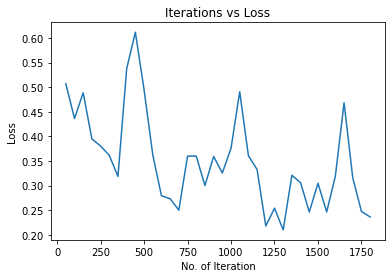

In [88]:
plt.plot(iteration_list, loss_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Loss")
plt.title("Iterations vs Loss")
plt.show()


Grafica de iteraciones VS exactitud

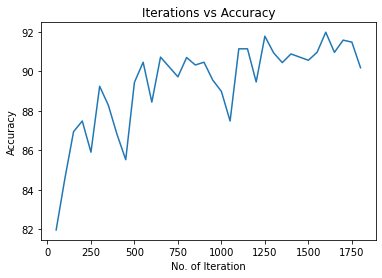

In [89]:
plt.plot(iteration_list, accuracy_list)
plt.xlabel("No. of Iteration")
plt.ylabel("Accuracy")
plt.title("Iterations vs Accuracy")
plt.show()

### Matriz de confusion 

In [90]:
from itertools import chain 

predictions_l = [predictions_list[i].tolist() for i in range(len(predictions_list))]
labels_l = [labels_list[i].tolist() for i in range(len(labels_list))]
predictions_l = list(chain.from_iterable(predictions_l))
labels_l = list(chain.from_iterable(labels_l))


In [91]:
import sklearn.metrics as metrics

confusion_matrix(labels_l, predictions_l)
print("Classification report for CNN :\n%s\n"
      % (metrics.classification_report(labels_l, predictions_l)))

Classification report for CNN :
              precision    recall  f1-score   support

           0       0.83      0.85      0.84     17928
           1       0.97      0.99      0.98     18360
           2       0.86      0.83      0.85     18360
           3       0.89      0.91      0.90     17748
           4       0.83      0.83      0.83     17784
           5       0.97      0.96      0.96     18360
           6       0.72      0.69      0.70     17316
           7       0.94      0.93      0.93     19044
           8       0.96      0.98      0.97     17712
           9       0.94      0.96      0.95     17388

    accuracy                           0.89    180000
   macro avg       0.89      0.89      0.89    180000
weighted avg       0.89      0.89      0.89    180000


